In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from dsn.train_dsn import train_dsn
import seaborn as sns
import pandas as pd
import warnings
import scipy
from dsn.util.systems import Linear2D
from dsn.util.plot_util import plot_opt, assess_constraints, dsn_pairplots
from dsn.util.dsn_util import get_savedir
from tf_util.stat_util import approx_equal
warnings.filterwarnings("ignore")

EPS = 1e-16

In [2]:
# filename info
c_init_order = 0
sigma_init = 1.0

fname = '/Users/sbittner/Documents/dsn/dsn/models/STGCircuit/STGCircuit_g_el_g_synA_hubfreq_mu=5.50E-01_3.03E-01_flow=5P_M_A_sigma=%.2f_c=%d_rs=1/opt_info.npz' % (sigma_init, c_init_order)

start_rs = 1
num_rs = 1

lr_order = -3

1


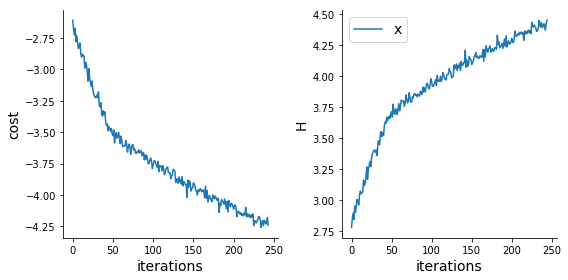

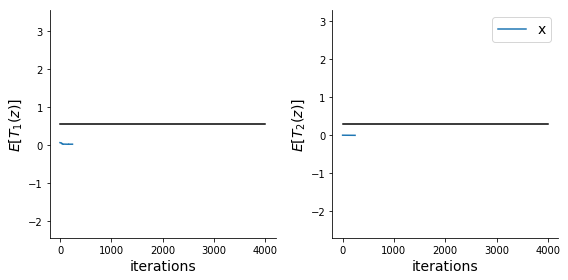

p values
0


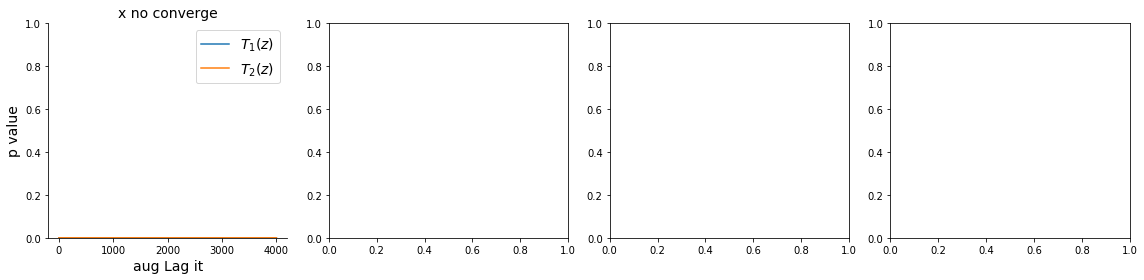

In [3]:
rs = 1
npzfile = np.load(fname);
mu = npzfile['mu'];
check_rate = npzfile['check_rate'];
last_ind = npzfile['it']//check_rate;
nits = npzfile['costs'].shape[0];
k_max = npzfile['T_xs'].shape[0]-1;
iterations = np.arange(0, check_rate*nits, check_rate);
legendstrs = ['x']
npz_behavior = npzfile['behavior'][()]
# check that behavior is right
#TODO fixed params assert(npz_behavior['tau'] == behavior['tau'])
print(check_rate)
    
figs, AL_final_its, p_values = plot_opt([fname], legendstrs, plotR2=False, frac_samps=0.5);

In [4]:
show_its = 300
Hs = npzfile['Hs']
costs = npzfile['costs']
param_vals = npzfile['param_vals']
cost_grads = npzfile['cost_grad_vals']
mean_T_xs = npzfile['mean_T_xs']
print('Hs')
print(Hs.shape)
print(Hs[:show_its])
print('costs')
print(costs.shape)
print(Hs[:show_its])
print('<T(x)>')
print(mean_T_xs.shape)
print(mean_T_xs[:show_its,0])
print(mean_T_xs[:show_its,1])
print('param vals')
print(param_vals.shape)
print(param_vals[:show_its,0])
print('cost grads')
print(cost_grads.shape)
print(cost_grads[:show_its,0])


Hs
(4001,)
[2.77699779 2.84823468 2.89341984 2.84189858 2.95028814 2.8994758
 2.9549372  3.00362282 2.98911698 2.95849714 3.0397577  3.07153969
 3.047951   3.05716556 3.06296367 3.15913598 3.11430238 3.13008076
 3.18421946 3.26603212 3.16612608 3.2407901  3.2758891  3.30993132
 3.26744582 3.33556799 3.37148045 3.38898007 3.39928897 3.4001218
 3.38091054 3.40240296 3.35694553 3.46458711 3.47714459 3.44383227
 3.5363957  3.55109178 3.51074174 3.54238872 3.52072238 3.60163747
 3.62728921 3.61878385 3.66863737 3.63723718 3.65685514 3.67606752
 3.65553703 3.69689308 3.7125052  3.66775318 3.7718852  3.7056011
 3.69020993 3.73454233 3.72371713 3.68947596 3.73069768 3.77749658
 3.71854801 3.75281074 3.80415319 3.79753634 3.79445087 3.79805434
 3.75479792 3.78248208 3.84724372 3.80791537 3.78298247 3.8012575
 3.86461554 3.82265735 3.78791618 3.79008778 3.83285787 3.82223215
 3.85491461 3.85817134 3.84409591 3.8497573  3.83057777 3.85269629
 3.84242159 3.83666666 3.87788361 3.86265462 3.84954757

In [5]:
first_nan = np.where(np.isnan(mean_T_xs[:,0]))[0][0]
print(first_nan)
print('Hs')
print('%s' % np.array2string(Hs[first_nan-3:first_nan+3]))
print('costs')
print('%s' % np.array2string(costs[first_nan-3:first_nan+3]))
print('T_xs')
print('%s' % np.array2string(mean_T_xs[first_nan-3:first_nan+3, 0]))
print('%s' % np.array2string(mean_T_xs[first_nan-3:first_nan+3, 1]))
num_params = param_vals.shape[1]
print('params')
for i in range(num_params):
    print(i, '%s' % np.array2string(param_vals[first_nan-3:first_nan+3, i]))

244
Hs
[4.40869256 4.37102619 4.43095097 4.44983532        nan        nan]
costs
[-4.21915702 -4.18112014 -4.24185353         nan         nan         nan]
T_xs
[0.0135378  0.01287515 0.01432042        nan        nan        nan]
[0.0004752  0.00042623 0.00053665        nan        nan        nan]
params
0 [-0.10791207 -0.10740773 -0.10690511         nan         nan         nan]
1 [-0.32333665 -0.32475022 -0.32616285         nan         nan         nan]
2 [0.02419972 0.02402152 0.02384509        nan        nan        nan]
3 [-0.29490424 -0.29602109 -0.2971383          nan         nan         nan]
4 [0.04076875 0.04067666 0.04058516        nan        nan        nan]
5 [0.41382991 0.41388069 0.41392902        nan        nan        nan]
6 [-0.93086027 -0.93027039 -0.9296815          nan         nan         nan]
7 [0.05221096 0.0523349  0.05246312        nan        nan        nan]
8 [0.29141881 0.2911811  0.29094167        nan        nan        nan]
9 [-0.79688575 -0.79745791 -0.79802959     

In [6]:
print('cost grads')
for i in range(num_params):
    print(i, '%s' % np.array2string(cost_grads[first_nan-3:first_nan+3, i]))

cost grads
0 [-0.02004557 -0.01846811 -0.02106986         nan         nan         nan]
1 [0.16019048 0.16020703 0.15823356        nan        nan        nan]
2 [0.11635423 0.10321571 0.10518806        nan        nan        nan]
3 [0.31162517 0.31217089 0.31142475        nan        nan        nan]
4 [0.07625632 0.0752648  0.06511737        nan        nan        nan]
5 [-0.01642269 -0.03150628 -0.01518834         nan         nan         nan]
6 [-0.09251021 -0.09259614 -0.08736161         nan         nan         nan]
7 [-0.16272566 -0.09200429 -0.16157288         nan         nan         nan]
8 [0.28021776 0.26223797 0.29552663        nan        nan        nan]
9 [0.31366667 0.31789424 0.31749909        nan        nan        nan]
10 [-0.02911908 -0.02580042 -0.02876512         nan         nan         nan]
11 [0.014979   0.01498477 0.01211615        nan        nan        nan]
12 [0.22742736 0.8235105  0.3379937         nan        nan        nan]
13 [-1.04815721 -1.41049208 -0.85952823       

In [7]:
from dsn.util.plot_util import pairplot
Zs = npzfile['Zs']
print(Zs.shape)


(4001, 1000, 2)


In [21]:
from dsn.util.systems import STGCircuit

behavior_type = "hubfreq"

dt = 0.025
T = 210
fft_start = 10
w = 20

mean = 0.55
variance = 0.0001
fixed_params = {'g_synB':5e-9}
behavior = {"type":"hubfreq",
            "mean":mean,
            "variance":variance}
model_opts = {"dt":dt,
              "T":T,
              "fft_start":fft_start,
              "w":w
             }

system = STGCircuit(fixed_params, behavior, model_opts)

In [22]:
Z = tf.placeholder(tf.float64, shape=(None, None, system.D), name="Z")
x_t = system.simulate(Z)
T_x = system.compute_suff_stats(Z)

In [23]:
print(x_t)

Tensor("stack_1263:0", shape=(211, ?), dtype=float64)


In [24]:
_Zs = np.expand_dims(Zs[first_nan,:,:], 0)
with tf.Session() as sess:
    _T_x, _x_t = sess.run([T_x, x_t], {Z:_Zs})

598
[[ 3.52434703 15.18480582]]
(211,)


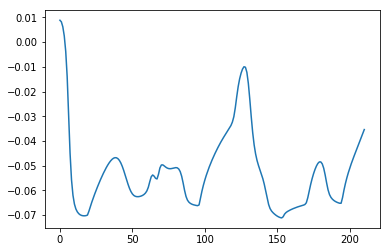

In [25]:
nan_ind = np.where(np.isnan(_T_x[0,:,0]))[0][0]
print(nan_ind)
Znan = _Zs[:,nan_ind,:]
print(Znan)
print(_x_t[:,nan_ind].shape)
plt.figure()
plt.plot(_x_t[:,nan_ind])
plt.show()

In [26]:
print(Znan)

[[ 3.52434703 15.18480582]]


In [27]:
class stg_circuit:
    def __init__(self, dt=0.025, T=2400, fft_start=400, w=40):
        self.dt = dt
        self.T = T
        self.fft_start = fft_start
        self.w = w
        """V_m0 = -65.0e-3*np.ones((5,))
        N_0 = 0.25*np.ones((5,))
        H_0 = 0.1*np.ones((5,))
        self.init_conds = np.concatenate((V_m0, N_0, H_0), axis=0)"""
        self.init_conds = np.array([-0.04169771, -0.04319491,  0.00883992, -0.06879824,  0.03048103,
                                     0.00151316, 0.19784773, 0.56514935, 0.12214069, 0.35290397,
                                     0.08614699, 0.04938177, 0.05568701, 0.07007949, 0.05790969])


    def simulate(self, g_el, g_synA, g_synB):
        # define fixed parameters

        #conductances
        C_m = 1.0e-9

        # volatages
        V_leak = -40.0e-3 # 40 mV
        V_Ca = 100.0e-3 # 100mV
        V_k = -80.0e-3 # -80mV
        V_h = -20.0e-3 # -20mV
        V_syn = -75.0e-3 # -75mV

        v_1 = 0.0 # 0mV
        v_2 = 20.0e-3 # 20mV
        v_3 = 0.0 # 0mV
        v_4 = 15.0e-3 # 15mV
        v_5 = 78.3e-3 # 78.3mV
        v_6 = 10.5e-3 # 10.5mV
        v_7 = -42.2e-3 # -42.2mV
        v_8 = 87.3e-3 # 87.3mV
        v_9 = 5.0e-3  # 5.0mV

        v_th = -25.0e-3 # -25mV

        # neuron specific conductances
        g_Ca_f = 1.9e-2 * (1e-6) # 1.9e-2 \mu S
        g_Ca_h = 1.7e-2 * (1e-6) # 1.7e-2 \mu S
        g_Ca_s = 8.5e-3 * (1e-6) # 8.5e-3 \mu S

        g_k_f  = 3.9e-2 * (1e-6) # 3.9e-2 \mu S
        g_k_h  = 1.9e-2 * (1e-6) # 1.9e-2 \mu S
        g_k_s  = 1.5e-2 * (1e-6) # 1.5e-2 \mu S

        g_h_f  = 2.5e-2 * (1e-6) # 2.5e-2 \mu S
        g_h_h  = 8.0e-3 * (1e-6) # 8.0e-3 \mu S
        g_h_s  = 1.0e-2 * (1e-6) # 1.0e-2 \mu S

        g_Ca = np.array([g_Ca_f, g_Ca_f, g_Ca_h, g_Ca_s, g_Ca_s])
        g_k = np.array([g_k_f, g_k_f, g_k_h, g_k_s, g_k_s])
        g_h = np.array([g_h_f, g_h_f, g_h_h, g_h_s, g_h_s])

        g_leak = 1.0e-4 * (1e-6) # 1e-4 \mu S

        phi_N = 2 # 0.002 ms^-1

        def f(x, g_el, g_synA, g_synB):
            # x contains
            V_m = x[:5]
            N = x[5:10]
            H = x[10:]

            M_inf = 0.5*(1.0 + np.tanh((V_m - v_1)/ v_2))
            N_inf = 0.5*(1.0 + np.tanh((V_m - v_3)/v_4))
            H_inf = 1.0 / (1.0 + np.exp((V_m + v_5)/v_6))

            S_inf = 1.0 / (1.0 + np.exp((v_th - V_m) / v_9))

            I_leak = g_leak*(V_m - V_leak)
            I_Ca = g_Ca*M_inf*(V_m - V_Ca)
            I_k = g_k*N*(V_m - V_k)
            I_h = g_h*H*(V_m - V_h)

            I_elec = np.array([0.0,
                               g_el*(V_m[1]-V_m[2]),
                               g_el*(V_m[2]-V_m[1] + V_m[2]-V_m[4]),
                               0.0,
                               g_el*(V_m[4]-V_m[2])])

            I_syn = np.array([g_synB*S_inf[1]*(V_m[0] - V_syn),
                                g_synB*S_inf[0]*(V_m[1] - V_syn),
                                g_synA*S_inf[0]*(V_m[2] - V_syn) + g_synA*S_inf[3]*(V_m[2] - V_syn),
                                g_synB*S_inf[4]*(V_m[3] - V_syn),
                                g_synB*S_inf[3]*(V_m[4] - V_syn)])

            I_total = I_leak + I_Ca + I_k + I_h + I_elec + I_syn

            lambda_N = (phi_N)*np.cosh((V_m - v_3)/(2*v_4))
            tau_h = (272.0 - (-1499.0 / (1.0 + np.exp((-V_m + v_7) / v_8)))) / 1000.0

            dVmdt = (1.0 / C_m)*(-I_total)
            dNdt = lambda_N*(N_inf - N)
            dHdt = (H_inf - H) / tau_h

            dxdt = np.concatenate((dVmdt, dNdt, dHdt), axis=0)
            return dxdt

        x = self.init_conds
        xs = [x]
        for t in range(self.T):
            dxdt = f(x, g_el, g_synA, g_synB)
            x = dxdt*self.dt + x
            xs.append(x)
        X = np.array(xs)

        return X

    def T_x(self, g_el, g_synA, g_synB):
        def moving_average(a, n=3) :
            ret = np.cumsum(a, dtype=float)
            ret[n:] = ret[n:] - ret[:-n]
            return ret[n - 1:] / n

        # sampling frequency
        Fs  = 1.0 / self.dt
        # num samples for freq measurement
        N = self.T - self.fft_start + 1 - (self.w-1)

        min_freq = 0.0
        max_freq = 1.0
        num_freqs = 101
        freqs = np.linspace(min_freq, max_freq, num_freqs)

        ns = np.arange(0,N)
        phis = []
        for i in range(num_freqs):
            k = N*freqs[i] / Fs
            phi = np.cos(2*np.pi*k*ns/N) - 1j * np.sin(2*np.pi*k*ns/N)
            phis.append(phi)

        Phi = np.array(phis)

        alpha = 100

        X = self.simulate(g_el, g_synA, g_synB)
        v_h = X[self.fft_start:,2]
        print(v_h)

        v_h_rect = np.maximum(v_h+0.01, 0.00)
        print(v_h_rect)
        v_h_rect_LPF = moving_average(v_h_rect, self.w)
        print(v_h_rect_LPF)
        #v_h_rect_LPF = v_h_rect_LPF - np.mean(v_h_rect_LPF)

        V_h = np.abs(np.dot(Phi, v_h_rect_LPF))
        print(V_h)
        V_h_pow = np.power(V_h, alpha)
        print(V_h_pow)
        freq_id = V_h_pow / np.sum(V_h_pow)

        freq = np.dot(freqs, freq_id)
        T_x = np.array([freq, np.square(freq)])
        return T_x

[ 0.00883992  0.00819167  0.00618396  0.00247539 -0.00371223 -0.01391722
 -0.0291643  -0.04495504 -0.05570592 -0.06195301 -0.0654946  -0.06748763
 -0.06866053 -0.06939955 -0.0698629  -0.0701296  -0.07025123 -0.07026486
 -0.07019399 -0.06997543 -0.06841738 -0.06652237 -0.06474454 -0.0630638
 -0.06145975 -0.05991972 -0.05843676 -0.05700791 -0.0556332  -0.054315
 -0.05305793 -0.05186895 -0.05075768 -0.04973699 -0.04882362 -0.04803895
 -0.04740953 -0.04696739 -0.04674945 -0.04679564 -0.04714492 -0.04782871
 -0.04886176 -0.05023157 -0.05188902 -0.05374384 -0.05566898 -0.05751684
 -0.05914733 -0.06045974 -0.06141421 -0.0620314  -0.06237362 -0.062518
 -0.06252965 -0.06244582 -0.06227823 -0.06201912 -0.06163938 -0.06107409
 -0.06018554 -0.05870515 -0.05646072 -0.05445778 -0.0537517  -0.05423038
 -0.05510381 -0.05535548 -0.05348949 -0.05089125 -0.04969479 -0.04967028
 -0.0500921  -0.05057004 -0.05094266 -0.05115926 -0.05122127 -0.05115726
 -0.05101383 -0.05085509 -0.05076816 -0.05087409 -0.0513

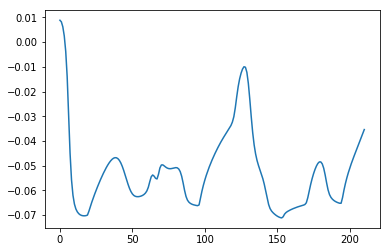

In [28]:
g_synB = 5.0e-9
true_sys = stg_circuit(dt=dt, T=T, fft_start=0, w=w)
x_t_true = true_sys.simulate(Znan[0][0]*1.0e-9, Znan[0][1]*1.0e-9, g_synB)
T_x_true = true_sys.T_x(Znan[0][0]*1.0e-9, Znan[0][1]*1.0e-9, g_synB)
print(x_t_true.shape)
v_h = x_t_true[:,2]
plt.figure()
plt.plot(v_h)
plt.show()

In [29]:
print(T_x_true)

[0.37827672 0.14309327]
